In [87]:
# Here i tested a built in way of cross-validating in order to evaulate the estimators preformance
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import seaborn as sns


# Unzip KO terms
zip_file_path_KO = 'terms_KO.zip' 
csv_file_name_KO = 'terms_KO.csv' 

# Unzip reduced dataset
zip_file_path = 'reducedDataset.zip' 
csv_file_name = 'reducedDataset.csv' 

In [88]:
# Reads and processes GO terms
with zipfile.ZipFile(zip_file_path_KO, 'r') as z:
    with z.open(csv_file_name_KO) as file:
        KOs = pd.read_csv(file, index_col=0)

KOs['value'] = 1
X_terms = KOs.pivot_table(index='key', columns='KO', values='value', fill_value=0)

In [89]:
# Processes data for traits.

with zipfile.ZipFile(zip_file_path, 'r') as zip:
    with zip.open(csv_file_name) as file:
        traits = pd.read_csv(file, sep=';')

# The missing values for the oxygen column are removed and then the keys are grouped together
y = traits.dropna(subset=['oxygen']).groupby('key').agg({'oxygen': lambda x: x.value_counts().index[0]})

In [90]:
# Finds all the common keys between X and Y due to descrepancies adter the removal of empty oxygen values
common_keys = X_terms.index.intersection(y.index)

In [91]:
# Align X and Y based on common keys
X = X_terms.loc[common_keys]
Y = y.loc[common_keys].values.ravel()
# Ensures X and Y are aligned
assert X.shape[0] == len(Y), "X and Y are not aligned"

In [92]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
class_names =traits

Shape of X: (3256, 10188)
Shape of Y: (3256,)


In [93]:
# Normalize Data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [94]:
# I dont know if these should be removed or not
# selector = VarianceThreshold()
# X_var_thresh = selector.fit_transform(X)
# The feature Selection
select_k = SelectKBest(f_classif, k=20)  # Dont know what k should be
X_new = select_k.fit_transform(X_norm, Y)

c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 655 1950 2156 2834 4079 4814 5521 5579 5798 6130 6230 8525 8571 8848] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [95]:
# Testing the cross validation for the entire dataset before it is splitted
# Evaluates the model on the same type of data it will encounter in traning and testing
# This is smart to do before the data splitting so that the cross-validation has access to the entire dataset for a more comprehensive evaluation
clf = svm.SVC(kernel="linear", C=1)
scores = cross_val_score(clf, X_new, Y, cv=5)
print("Cross-Validation Scores on the Entire Dataset:", scores)

# Testing using cross-validated metrics
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.4, random_state=0)

# Checking that all datasets have the correct shape
X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

# The classification algorithm
clf = svm.SVC(kernel="linear", C=1)


# Preforms on the training data
scores = cross_val_score(clf, X_train, Y_train, cv=5)

c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores on the Entire Dataset: [0.71 0.75 0.74 0.7  0.74]


c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7390636991557943
Confusion Matrix:
 [[718   1   9   0  19   3   0   0]
 [  0   1   1   0   0   0   0   0]
 [ 18   0 177   0   5   8   0   0]
 [  2   0   0   0   0   0   0   0]
 [107   2  29   0  19  11   0   0]
 [ 26   0  29   0   8  48   0   0]
 [ 43   0   0   0   1   0   0   0]
 [  0   0  13   0   0   5   0   0]]


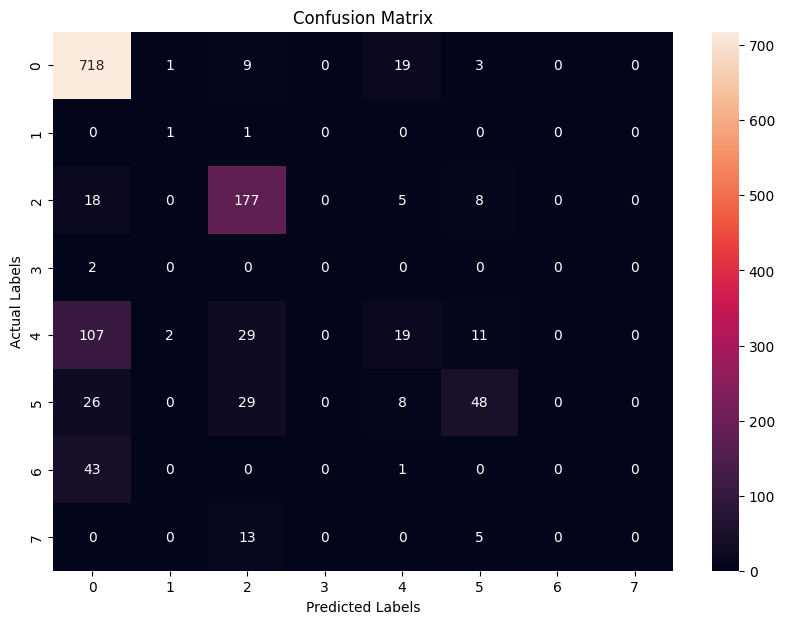

Classification Report:
                     precision    recall  f1-score   support

           aerobic       0.79      0.96      0.86       750
      aerotolerant       0.25      0.50      0.33         2
         anaerobic       0.69      0.85      0.76       208
          conflict       0.00      0.00      0.00         2
       facultative       0.37      0.11      0.17       168
   microaerophilic       0.64      0.43      0.52       111
  obligate aerobic       0.00      0.00      0.00        44
obligate anaerobic       0.00      0.00      0.00        18

          accuracy                           0.74      1303
         macro avg       0.34      0.36      0.33      1303
      weighted avg       0.66      0.74      0.68      1303

Cross-Validation Scores: [0.74 0.72 0.71 0.71 0.74]


c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Eliah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [96]:
# Evaluating the fit of the model
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Evaluatioins:

# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


# another confusion matrix test
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


# Cross validation scores:
print("Cross-Validation Scores:", scores)

Confusion matrix, without normalization
[[718   1   9   0  19   3   0   0]
 [  0   1   1   0   0   0   0   0]
 [ 18   0 177   0   5   8   0   0]
 [  2   0   0   0   0   0   0   0]
 [107   2  29   0  19  11   0   0]
 [ 26   0  29   0   8  48   0   0]
 [ 43   0   0   0   1   0   0   0]
 [  0   0  13   0   0   5   0   0]]
Normalized confusion matrix
[[0.96 0.   0.01 0.   0.03 0.   0.   0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.   0.  ]
 [0.09 0.   0.85 0.   0.02 0.04 0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.64 0.01 0.17 0.   0.11 0.07 0.   0.  ]
 [0.23 0.   0.26 0.   0.07 0.43 0.   0.  ]
 [0.98 0.   0.   0.   0.02 0.   0.   0.  ]
 [0.   0.   0.72 0.   0.   0.28 0.   0.  ]]


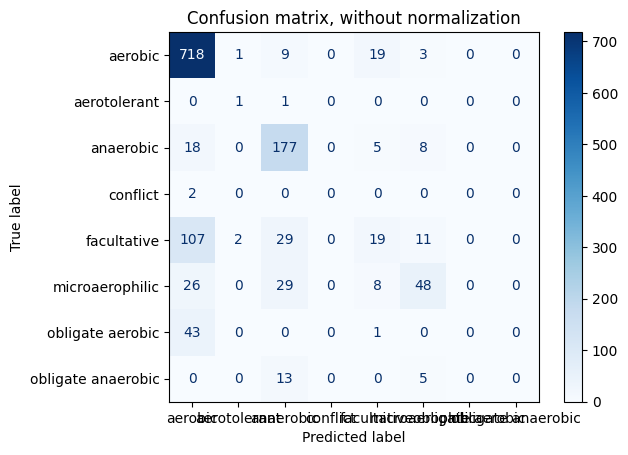

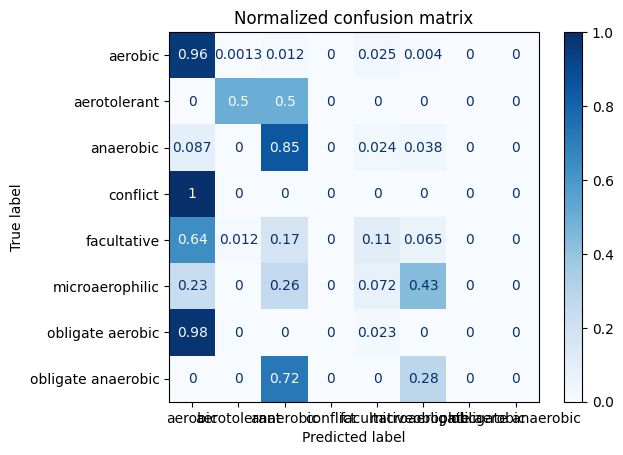

In [97]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()